In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# getting the data from UC Irving machine learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


| **Category**        | **Column Name**           | **Description**                                | **Values**                     |
|---------------------|---------------------------|------------------------------------------------|---------------------------------|
| Administrative      | `Administrative`          | Number of administrative pages visited         | Integer                           |
|                     | `Administrative_Duration` | Time spent on administrative pages (seconds)   | Float                           |
| Informational       | `Informational`           | Number of informational pages visited          | Integer                        |
|                     | `Informational_Duration`  | Time spent on informational pages (seconds)    | Float                          |
| Product-Related     | `ProductRelated`          | Number of product pages visited                | Integer                        |
|                     | `ProductRelated_Duration` | Time spent on product pages (seconds)          | Float                          |
| User Engagement     | `BounceRates`             | Percentage of visitors who left immediately    | Float (0–1)                    |
|                     | `ExitRates`               | Percentage of pageviews that were last in session | Float (0–1)                  |
|                     | `PageValues`              | Average value of pages viewed before purchase  | Float (≥ 0)                    |
| Traffic Source      | `TrafficType`             | Source of traffic (20 categories)              | Integer (1–20)                 |
| Visitor Type        | `VisitorType`             | Type of visitor                                | 'New_Visitor', 'Returning_Visitor', 'Other' |
| Weekend             | `Weekend`                | Whether session occurred on weekend            | Boolean (True/False)           |
| Temporal            | `Month`                  | Month of the year                              | Abbreviated (e.g., 'Feb', 'Nov') |
| Special Day         | `SpecialDay`             | Proximity to special shopping day              | Float (0–1, where 1 = day of event) |
| Target Variable     | `Revenue`                | Whether purchase occurred                      | Boolean (True/False)           |

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [14]:
df.shape

(12330, 18)

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
duplicates = df[df.duplicated()]
duplicates.shape
print(duplicates)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

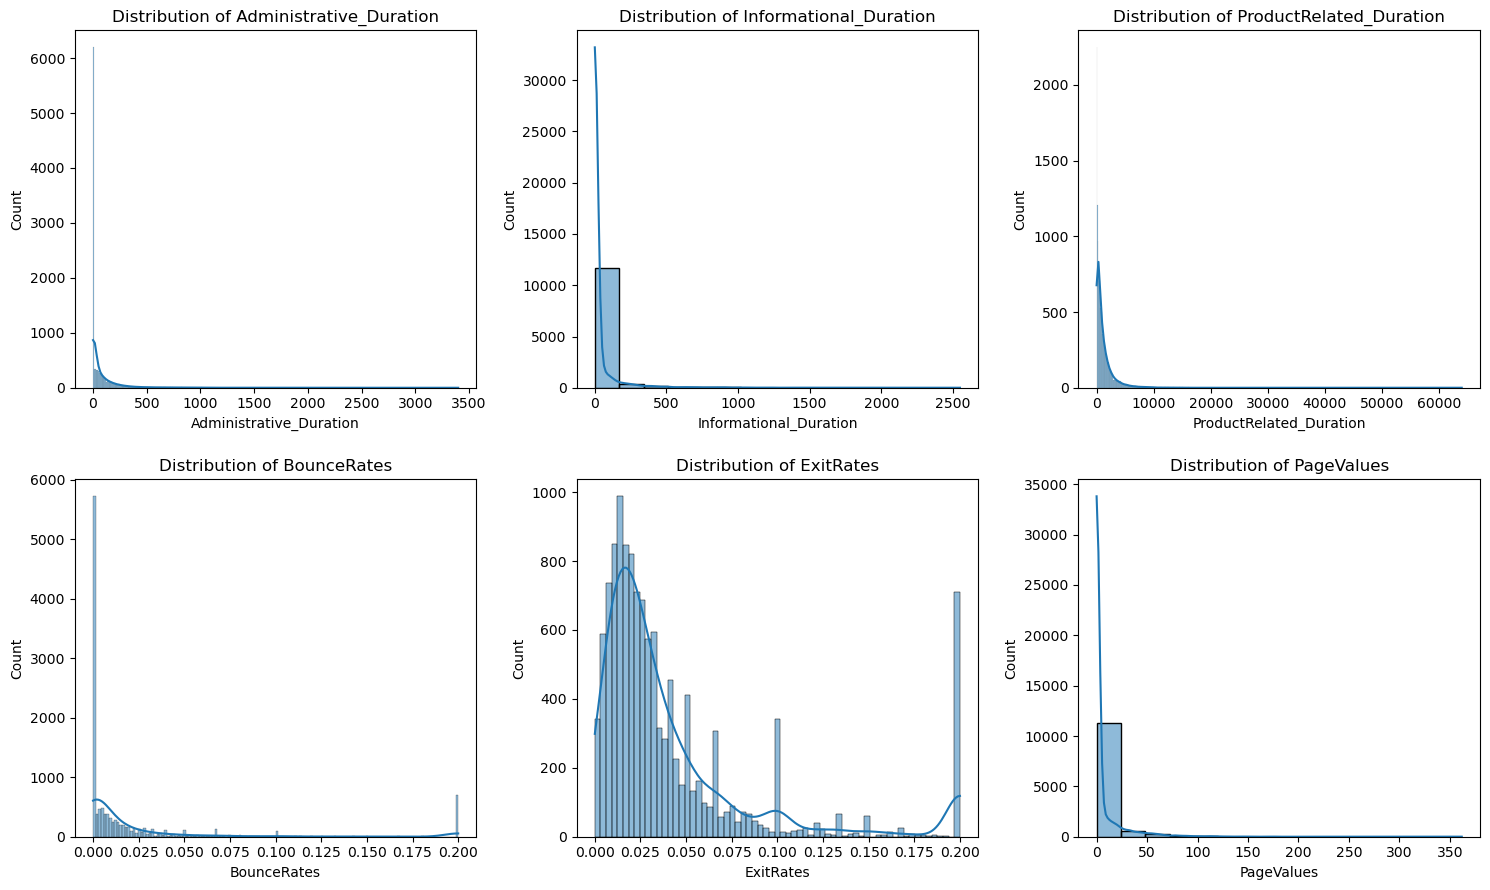

In [11]:
# Numerical fearures
numericalColumns = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues'
]
plt.figure(figsize=(15, 9))
for i, col in enumerate(numericalColumns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout(h_pad=2)
plt.show()

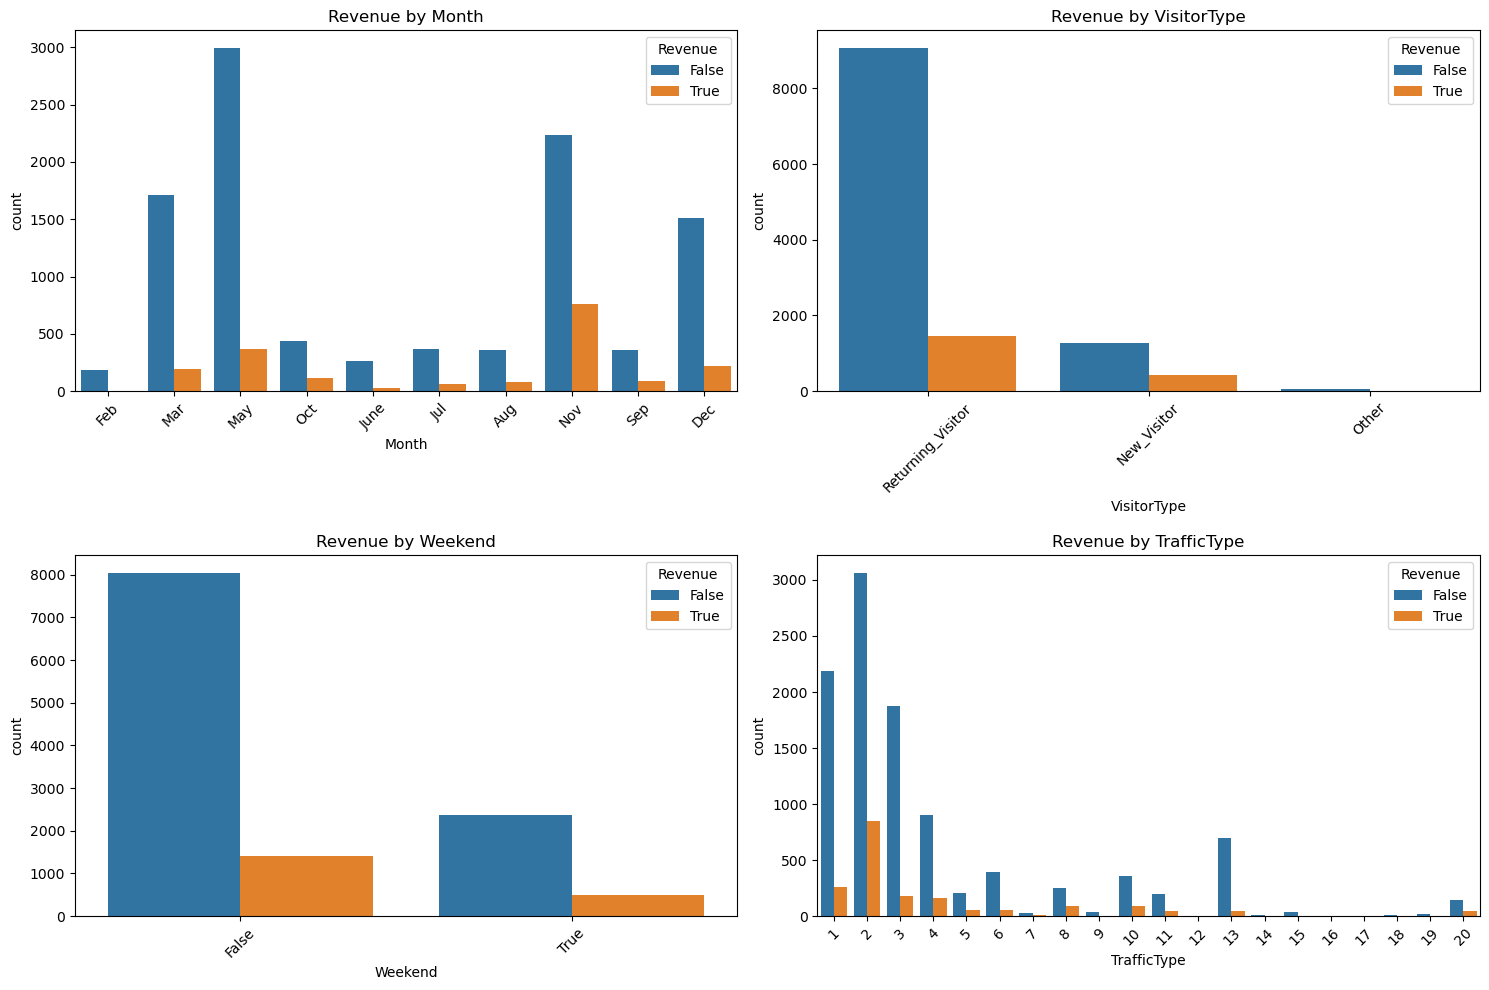

In [12]:
# Revenue distribution
categoricalColumns = [
    'Month',
    'VisitorType',
    'Weekend',
    'TrafficType'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categoricalColumns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Revenue', data=df)
    plt.title(f'Revenue by {col}')
    plt.xticks(rotation=45)
plt.tight_layout(h_pad=1.5)
plt.show()

In [50]:
# Correlation
corr = df[numericalColumns +['Revenue']].corr()
corr

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
Administrative_Duration,1.000000,0.238031,0.355422,-0.144170,-0.205798,0.067608,0.093587
Informational_Duration,0.238031,1.000000,0.347364,-0.074067,-0.105276,0.030861,0.070345
ProductRelated_Duration,0.355422,0.347364,1.000000,-0.184541,-0.251984,0.052823,0.152373
BounceRates,-0.144170,-0.074067,-0.184541,1.000000,0.913004,-0.119386,-0.150673
ExitRates,-0.205798,-0.105276,-0.251984,0.913004,1.000000,-0.174498,-0.207071
PageValues,0.067608,0.030861,0.052823,-0.119386,-0.174498,1.000000,0.492569
Revenue,0.093587,0.070345,0.152373,-0.150673,-0.207071,0.492569,1.000000


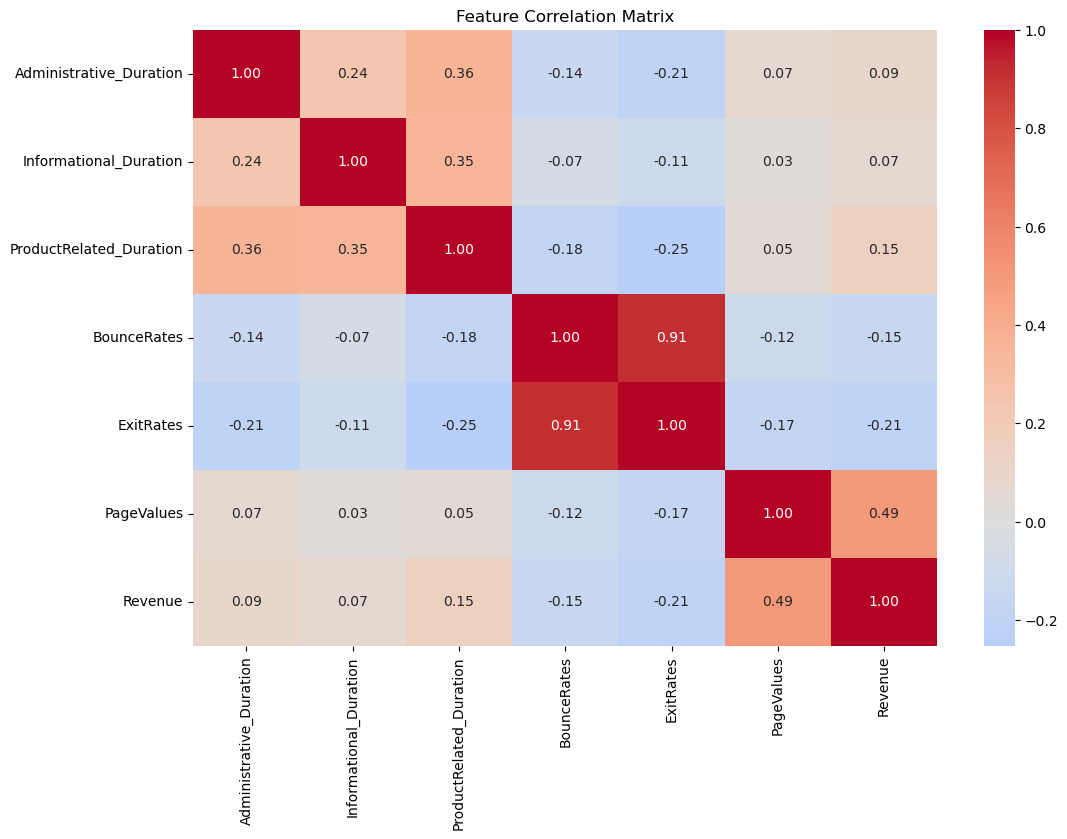

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
# Feature engineering
df['Total_Duration'] = df['Administrative'] + df['Administrative_Duration'] + df['ProductRelated_Duration']
df['PageValue_to_ExitRatio']= np.where(df['ExitRates']>0, df['PageValues']/df['ExitRates'], 0)
df['BounceExit_Interaction'] = df['BounceRates'] * df['ExitRates']

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,PageValue_to_ExitRatio,BounceExit_Interaction
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,Returning_Visitor,False,0,0.000000,0.000000,0.040000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,0,64.000000,0.000000,0.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,4,1,9,3,Returning_Visitor,False,0,0.000000,0.000000,0.040000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,Returning_Visitor,False,0,2.666667,0.000000,0.007000
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,Returning_Visitor,True,0,627.500000,0.000000,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,Returning_Visitor,True,0,1931.791667,421.683065,0.000207
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,Returning_Visitor,True,0,465.750000,0.000000,0.000000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,Returning_Visitor,True,0,184.250000,0.000000,0.007222
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,Returning_Visitor,False,0,425.000000,0.000000,0.000000


In [76]:
# Machine learning pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix, accuracy_score
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
x = df.drop('Revenue', axis=1)
y = df['Revenue']

In [42]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
numericalFeatures = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'Total_Duration',
    'PageValue_to_ExitRatio',
    'BounceExit_Interaction'
]

categoricalFeatures = [
    'Month',
    'VisitorType',
    'Weekend',
    'TrafficType',
]

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer()),
            ('scaler', StandardScaler())
        ]), numericalFeatures),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricalFeatures)
    ]
)
smote = SMOTE(sampling_strategy=0.5, random_state=42)

In [77]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__solver': ['lbfgs', 'liblinear']
        }
    },
    'NeuralNetwork': {
        'model': MLPClassifier(early_stopping=True),
        'params':{
            'model__hidden_layer_sizes': [(50,), (100,)],
            'model__alpha': [0.0001, 0.001],
            'model__learning_rate_init': [0.001, 0.01]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 5, 7]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}


====Training LogisticRegression====


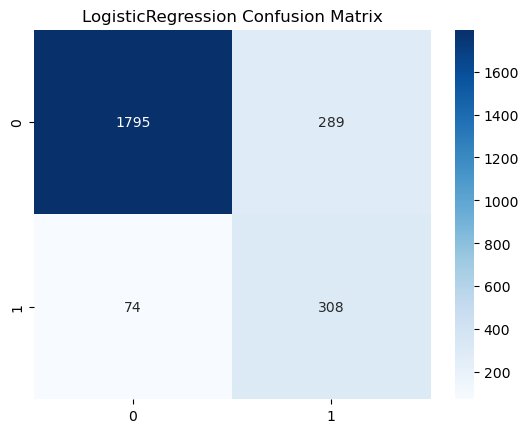

Best parameters: {'model__solver': 'liblinear', 'model__C': 0.1}
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2084
           1       0.52      0.81      0.63       382

    accuracy                           0.85      2466
   macro avg       0.74      0.83      0.77      2466
weighted avg       0.89      0.85      0.86      2466


====Training NeuralNetwork====


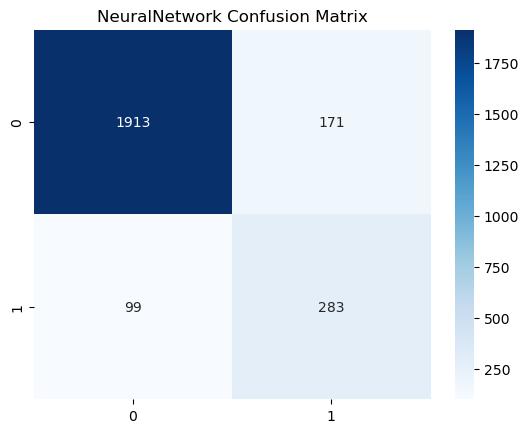

Best parameters: {'model__learning_rate_init': 0.001, 'model__hidden_layer_sizes': (100,), 'model__alpha': 0.0001}
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2084
           1       0.62      0.74      0.68       382

    accuracy                           0.89      2466
   macro avg       0.79      0.83      0.81      2466
weighted avg       0.90      0.89      0.89      2466


====Training RandomForest====


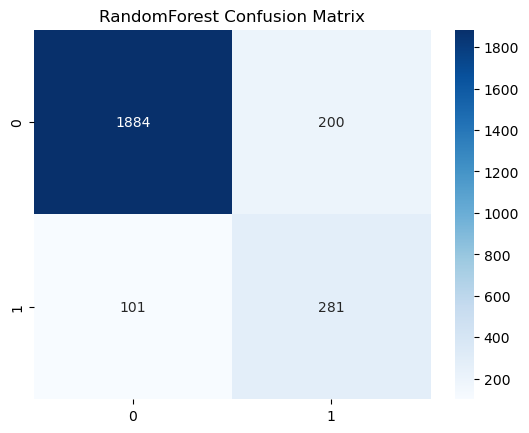

Best parameters: {'model__n_estimators': 200, 'model__max_depth': 7}
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2084
           1       0.58      0.74      0.65       382

    accuracy                           0.88      2466
   macro avg       0.77      0.82      0.79      2466
weighted avg       0.89      0.88      0.88      2466


====Training GradientBoosting====


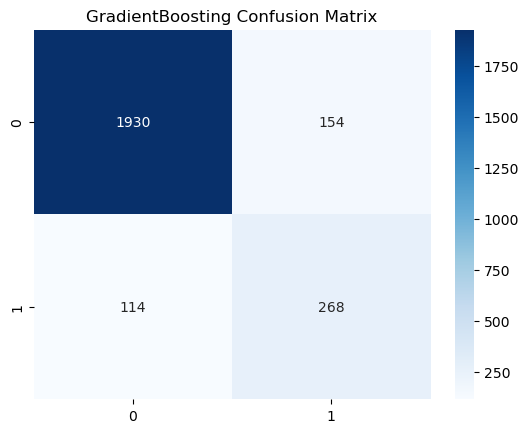

Best parameters: {'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2084
           1       0.64      0.70      0.67       382

    accuracy                           0.89      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.90      0.89      0.89      2466



In [79]:
results = {}

for name, config in models.items():
    print(f"\n====Training {name}====")

    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('model', config['model'])
    ])

    # Randomized Search
    search = RandomizedSearchCV(
        pipeline,
        config['params'],
        n_iter = 10,
        cv=StratifiedKFold(5),
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    search.fit(x_train, y_train)

    # Evaluate
    y_pred = search.best_estimator_.predict(x_test)
    y_proba = search.best_estimator_.predict_proba(x_test)[:,1]

    # Store results
    results[name] = {
        'model': search.best_estimator_,
        'best_params': search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    print(f"Best parameters: {search.best_params_}")
    print(classification_report(y_test, y_pred))

In [81]:
best_model = results['GradientBoosting']['model']
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Administrative_Duration',
                                                   'Informational_Duration',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'Total_Duration',
                                                   'PageValue_to_ExitRatio',
                                                   'BounceExit_Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'VisitorType',
                                                   'Weekend',
                                                   'TrafficType'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('model', GradientBoostingClassifier(random_state=42))])

In [91]:
best_model1 = results['NeuralNetwork']['model']
best_model1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Administrative_Duration',
                                                   'Informational_Duration',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'Total_Duration',
                                                   'PageValue_to_ExitRatio',
                                                   'BounceExit_Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'VisitorType',
                                                   'Weekend',
                                                   'TrafficType'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('model', MLPClassifier(early_stopping=True))])

In [90]:
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'ROC AUC': [res['roc_auc'] for res in results.values()],
    'Accuracy': [res['accuracy'] for res in results.values()]
}).sort_values('ROC AUC', ascending=False)

results_df.style.background_gradient(cmap='Blues')

,Model,ROC AUC,Accuracy
1,NeuralNetwork,0.930491,0.890511
3,GradientBoosting,0.927582,0.891322
2,RandomForest,0.918893,0.877940
0,LogisticRegression,0.913209,0.852798
